# Introduction

`Hyperopt` offers both random search and iterative tunning. In this toy example, let's try both out and compare them.

# Hyperopt

**fmin()** is the main function in hyperopt. It accepts four basic arguments and output the optimized parameter set:

* Objective Function — fn
* Search Space — space
* Search Algorithm — algo
* (Maximum) no. of evaluations — max_evals

We may also pass a Trials object to the **trials** argument to keep track of the whole process. In order to run with trails the output of the objective function has to be a dictionary including at least the keys 'loss' and 'status' which contain the results and the optimization status respectively. Below please see the interim values:

* trials.trials - a list of dictionaries contains all relevant information
* trials.results - a list of dictionaries collecting the function outputs
* trials.losses() - a list of losses (float for each 'ok' trial)
* trials.statuses() - a list of status strings
* trials.vals - a dictionary of sampled parameters

# Toy hyperopt example

In [38]:
from hyperopt import hp, fmin, tpe, rand, Trials, STATUS_OK
import matplotlib.pyplot as plt

## TPE iterative tuning

In [79]:
# Define a simple objective function. For a machine learning model, this will relate to the metrics we want to optimize
def f(x):
    return {'loss': x ** 2 - x,
            'status': STATUS_OK}

# Run hyperopt tunning, let's use the iterative TPE method first
trials = Trials()
result = fmin(
    fn = f,                           # objective function
    space = hp.uniform('x', -1, 1),   # parameter space
    algo = tpe.suggest,               # iterative search algorithm
    max_evals = 500,                  # no. of evaluations
    trials = trials                   # trial object that keeps track of the results
)


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 120.46trial/s, best loss: -0.24999999989281957]


In [52]:
# print the optimized parameters which result in the smallest loss
print(result)

{'x': 0.4996311506514813}


[Text(0.5, 1.0, 'TPE iterative optimization'),
 Text(0.5, 0, 'Search Space'),
 Text(0, 0.5, 'Loss')]

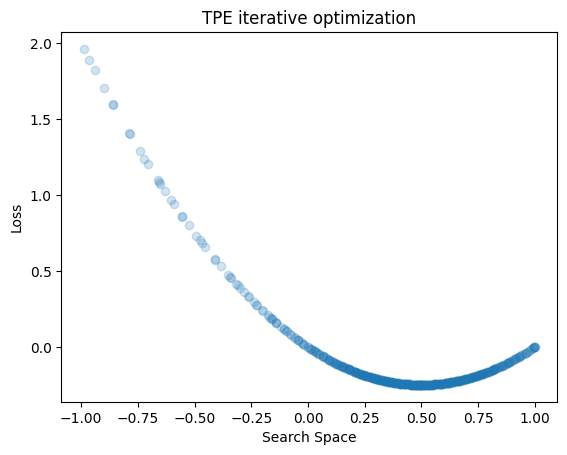

In [83]:
# extract and plot the trials from the trails object
x = trials.vals['x']
y = [x['loss'] for x in trials.results]
plt.scatter(x, y, alpha=0.2)
plt.gca().update(dict(title  = 'TPE iterative optimization',
                      xlabel = 'Search Space',
                      ylabel = 'Loss'))

## A few thoughts
* The final value is not necessarily the theoretial optimal (0.5 here), but hopefully close enough
* Note in the above graph that the values are the most condensed around the smallest loss, since an iterative optimization algorithm (tpe) was used here, meaning any subsequent search learned from previous runs and casted its net strategically. 
* In contrast, if we use random search, values should be more evenly distributed across the search space. Let's try it next.

## Randon Search Tuning

In [81]:
# Run hyperopt tunning with random search
trials_rand = Trials()
result_rand = fmin(
    fn = f,                           # objective function
    space = hp.uniform('x', -1, 1),   # parameter space
    algo = rand.suggest,              # random search algorithm
    max_evals = 500,                  # no. of evaluations
    trials = trials_rand              # trial object that keeps track of the results
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 572.29trial/s, best loss: -0.24998281523024413]


[Text(0.5, 1.0, 'Randon search optimization'),
 Text(0.5, 0, 'Search Space'),
 Text(0, 0.5, 'Loss')]

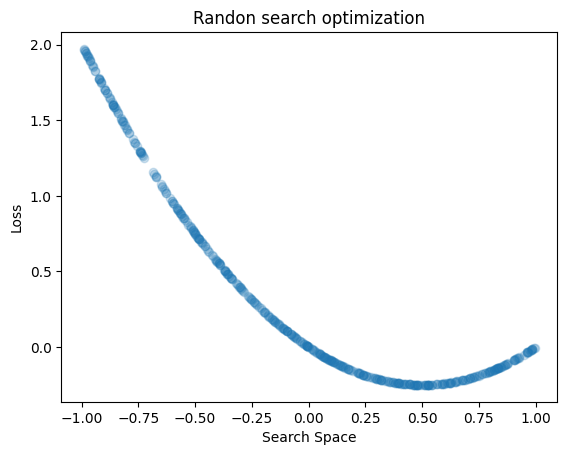

In [84]:
# extract and plot the trials from the trails object
x = trials_rand.vals['x']
y = [x['loss'] for x in trials_rand.results]
plt.scatter(x, y,alpha=0.2)
plt.gca().update(dict(title  = 'Randon search optimization',
                      xlabel = 'Search Space',
                      ylabel = 'Loss'))

This is a very simple toy example of hyperopt inspired by [this article](https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e). Much more to learn here regarding hyperparameter tuning for various machine learning algorithms such as XGBoost and LightGBM. :)  